In [1]:
import pandas as pd
import os
import json 
import glob
import sqlite3, sqlalchemy

In [2]:
#utiliser le json indiquer les dossiers dans lesquels l'on veut travailler 
with open('../parameters.json') as json_data:
    params = json.load(json_data)

In [3]:
params

{'DATABASES': {'GAS_DB': 'gas.db'},
 'DIRECTORIES': {'DATA_DIR': '../../Data', 'TMP_DIR': '../../tmp'},
 'FILES': {'PRICE_FILE': 'prices.p',
  'SERVICE_FILE': 'services.p',
  'STATION_FILE': 'stations.p'}}

In [4]:
### Répertoire de données, les constantes on les met en majuscule, lecture des parametres de Jison

DATA_DIR = params['DIRECTORIES']['DATA_DIR']
TMP_DIR = params['DIRECTORIES']['TMP_DIR']
PRICE_FILES = params['FILES']['PRICE_FILE']
STATION_FILES = params['FILES']['STATION_FILE']
SERVICE_FILES = params['FILES']['SERVICE_FILE']
GAS_DB = os.path.join(DATA_DIR, params['DATABASES']['GAS_DB'])


In [5]:
### Lire les données 
### list des fichiers qui continennent les prix, lire tous les fichiers qui commencent par prix
gas_files = glob.glob(os.path.join(DATA_DIR, "Prix*.zip"))
stations_file = 'Stations2016.zip'
services_file ='Services2016.zip'

In [6]:

dfall =pd.DataFrame()

for year in gas_files:
    df = pd.read_csv(year, 
                     sep=';', header=None, dtype ={1:str}
                    )
    df.columns = ['id_station', 'code_postal', 'type_station', 'latitude', 'longitude', 
                  'date_releve', 'type_carburant', 'libele_carburant','prix']
    dfall = pd.concat([dfall, df], axis=0)
dfall.shape
assert dfall.shape[1] == 9

In [7]:
### Chargement des données stations et services 
dfstations = pd.read_csv(os.path.join(DATA_DIR, stations_file), sep='|', header=None, dtype={1:str}, encoding='utf-8')
dfstations.columns = ['id_station', 'code_postal', 'type_station', 'latitude', 'longitude', 'adresse', 'ville']

In [8]:
dfstations.head()

,id_station,code_postal,type_station,latitude,longitude,adresse,ville
0,1000001,01000,R,4.620114e+06,519791.000000,596 AVENUE DE TREVOUX,SAINT-DENIS-LèS-BOURG
1,1000002,01000,R,4.621842e+06,522767.000000,16 Avenue de Marboz,BOURG-EN-BRESSE
2,1000004,01000,R,4.618836e+06,524447.000000,20 Avenue du Maréchal Juin,Bourg-en-Bresse
3,1000005,01000,R,4.620094e+06,519942.024022,642 Avenue de Trévoux,SAINT-DENIS-LèS-BOURG
4,1000006,01000,R,4.620754e+06,523758.000000,1 Boulevard John Kennedy,BOURG-EN-BRESSE


In [9]:
dfservices = pd.read_csv(os.path.join(DATA_DIR, services_file), sep='|', header=None, dtype={1:str}, encoding='utf-8')


In [10]:
dfservices.columns = ['id_station', 'code_postal', 'type_station', 'latitude', 'longitude', 'type_service']

In [11]:
dfservices.head()

,id_station,code_postal,type_station,latitude,longitude,type_service
0,1000001,01000,R,4.620114e+06,519791.000000,"Station de gonflage,Vente de gaz domestique,Au..."
1,1000002,01000,R,4.621842e+06,522767.000000,"Vente de gaz domestique,Automate CB"
2,1000004,01000,R,4.618836e+06,524447.000000,"Carburant qualité supérieure,GPL,Toilettes pub..."
3,1000005,01000,R,4.620094e+06,519942.024022,"Carburant qualité supérieure,Station de lavage..."
4,1000006,01000,R,4.620754e+06,523758.000000,Vente de gaz domestique


In [12]:
# Transformer la base de données en version pickle, de csv en pickle
dfall.to_pickle(os.path.join(DATA_DIR,PRICE_FILES))
dfstations.to_pickle(os.path.join(DATA_DIR,STATION_FILES))
dfservices.to_pickle(os.path.join(DATA_DIR,SERVICE_FILES))


In [13]:
%%time
testdf = pd.read_pickle(os.path.join(DATA_DIR,PRICE_FILES))

Wall time: 2.5 s


In [14]:
cnx = sqlite3.connect(GAS_DB)


In [15]:
dfall.to_sql('prices', cnx, index=False, if_exists='replace')

In [16]:
dfstations.to_sql('stations',cnx, index=False, if_exists='replace')
dfservices.to_sql('services',cnx, index=False, if_exists='replace')

In [17]:
pd.read_sql_query('select* from prices where code_postal="13001"',cnx)

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libele_carburant,prix
0,13001001,13001,R,4330446.0,538957.0,2014-01-01 06:00:00,1.0,Gazole,1399.0
1,13001001,13001,R,4330446.0,538957.0,2014-01-07 06:00:00,1.0,Gazole,1389.0
2,13001001,13001,R,4330446.0,538957.0,2014-01-24 06:00:00,1.0,Gazole,1389.0
3,13001001,13001,R,4330446.0,538957.0,2014-01-25 06:00:00,1.0,Gazole,1384.0
4,13001001,13001,R,4330446.0,538957.0,2014-01-28 06:00:00,1.0,Gazole,1389.0
5,13001001,13001,R,4330446.0,538957.0,2014-01-29 06:00:00,1.0,Gazole,1389.0
6,13001001,13001,R,4330446.0,538957.0,2014-01-30 06:00:00,1.0,Gazole,1389.0
7,13001001,13001,R,4330446.0,538957.0,2014-02-14 06:00:00,1.0,Gazole,1394.0
8,13001001,13001,R,4330446.0,538957.0,2014-02-18 06:00:00,1.0,Gazole,1399.0
9,13001001,13001,R,4330446.0,538957.0,2014-02-26 06:00:00,1.0,Gazole,1394.0


In [18]:
# On va faire un peu de code sql, faire des requetes sql, on a fait une connexion cnx avec la base de données, un curseur pour parcours de la base
cur = cnx.cursor()

In [19]:
cur.execute('SELECT*FROM prices where prix > 1400')
res = cur.fetchall()

In [20]:
# res est une version classique
res[:2]

[(1000001,
  '01000',
  'R',
  4620114.0,
  519791.0,
  '2014-02-28 10:28:03',
  1.0,
  'Gazole',
  1535.0),
 (1000001,
  '01000',
  'R',
  4620114.0,
  519791.0,
  '2014-03-22 08:55:00',
  1.0,
  'Gazole',
  1529.0)]

In [21]:
# Utiliser Pandas, res en dataframe 
res_df = pd.read_sql_query('SELECT*FROM prices where prix > 1400',cnx)

In [22]:
res_df.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libele_carburant,prix
0,1000001,01000,R,4620114.0,519791.0,2014-02-28 10:28:03,1.0,Gazole,1535.0
1,1000001,01000,R,4620114.0,519791.0,2014-03-22 08:55:00,1.0,Gazole,1529.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,2.0,SP95,1499.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,2.0,SP95,1499.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,2.0,SP95,1499.0


In [23]:
# Extraire le numero de la semaine de la variable date_releve, on veut faire une prédiction par semaine. 
#Verifier le type de nos variables
dfall.dtypes


id_station            int64
code_postal          object
type_station         object
latitude            float64
longitude           float64
date_releve          object
type_carburant      float64
libele_carburant     object
prix                float64
dtype: object

In [24]:
# convertir date_releve en date time 
import numpy as np 
dfall['date_releve'] = pd.to_datetime(dfall.date_releve)

In [25]:
dfall.dtypes


id_station                   int64
code_postal                 object
type_station                object
latitude                   float64
longitude                  float64
date_releve         datetime64[ns]
type_carburant             float64
libele_carburant            object
prix                       float64
dtype: object

In [26]:
## On est passé en date time, extraire les semaines, 
dfall.date_releve.dt.week.head()

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: date_releve, dtype: float64

In [27]:
## Créer une nouvelle colonne qui s'appelle semaine, 
dfall['semaine'] = dfall.date_releve.dt.week

In [28]:
dfall.head()

,id_station,code_postal,type_station,latitude,longitude,date_releve,type_carburant,libele_carburant,prix,semaine
0,1000001,01000,R,4620114.0,519791.0,2014-01-02 11:08:03,1.0,Gazole,1304.0,1.0
1,1000001,01000,R,4620114.0,519791.0,2014-01-04 09:54:03,1.0,Gazole,1304.0,1.0
2,1000001,01000,R,4620114.0,519791.0,2014-01-05 10:27:09,1.0,Gazole,1304.0,1.0
3,1000001,01000,R,4620114.0,519791.0,2014-01-06 09:07:51,1.0,Gazole,1304.0,2.0
4,1000001,01000,R,4620114.0,519791.0,2014-01-07 09:23:56,1.0,Gazole,1304.0,2.0


In [29]:
# Marche pas bien, pas de distinction entre l'année 2014 et 2015.
dfall['semaine'] = dfall.date_releve.dt.week + 52*(dfall.date_releve.dt.year - 2014)

In [30]:
dfall.semaine.min()

1.0

In [31]:
dfall.semaine.max()

157.0

In [32]:
### Faire attention et tenir compte des années bisextiles. Utiliser les fonctions de pandas, python 
# coder une aggrégation, après un groupby faire un resseting index, pour avoir de bonnes colonnes
dfall.groupby(['libele_carburant','semaine']).agg({'prix': [np.mean,min,max]}).head()
moyenne_hebdo_df = dfall.groupby(['libele_carburant','semaine']).agg({'prix': np.mean}).reset_index()

In [33]:
## Faire un graphique, 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

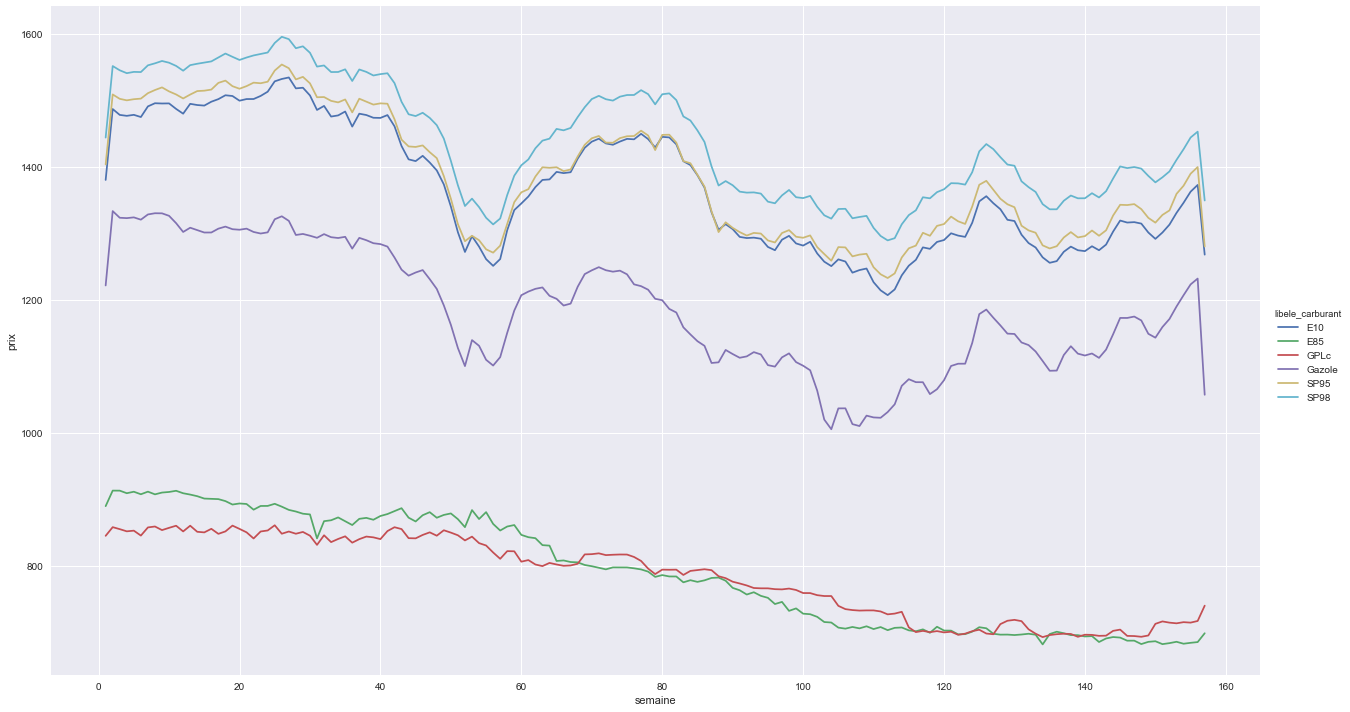

In [34]:
graph = sns.FacetGrid(moyenne_hebdo_df, hue='libele_carburant', size=10, aspect=16/9)
graph.map(plt.plot,'semaine', 'prix') 
graph.add_legend()

In [35]:
### On utilise une code de pandas pour tenir compte des années bisextiles, le grouppage est fait semaine par semaie
### Si l'on voulait faire 2 semaines par deux semaines, il faudrait écrire freq="2w" freq = "2 weeks"
moyenne_hebdo_df1 = (dfall
                    .dropna(subset=['date_releve'])
                    .groupby(['libele_carburant', pd.Grouper(key='date_releve', freq='1w')])
                    .agg({'prix': np.mean})
                   ).reset_index()

In [36]:
moyenne_hebdo_df1.head()

,libele_carburant,date_releve,prix
0,E10,2014-01-05,1490.439833
1,E10,2014-01-12,1487.090961
2,E10,2014-01-19,1478.254481
3,E10,2014-01-26,1476.861855
4,E10,2014-02-02,1478.376765


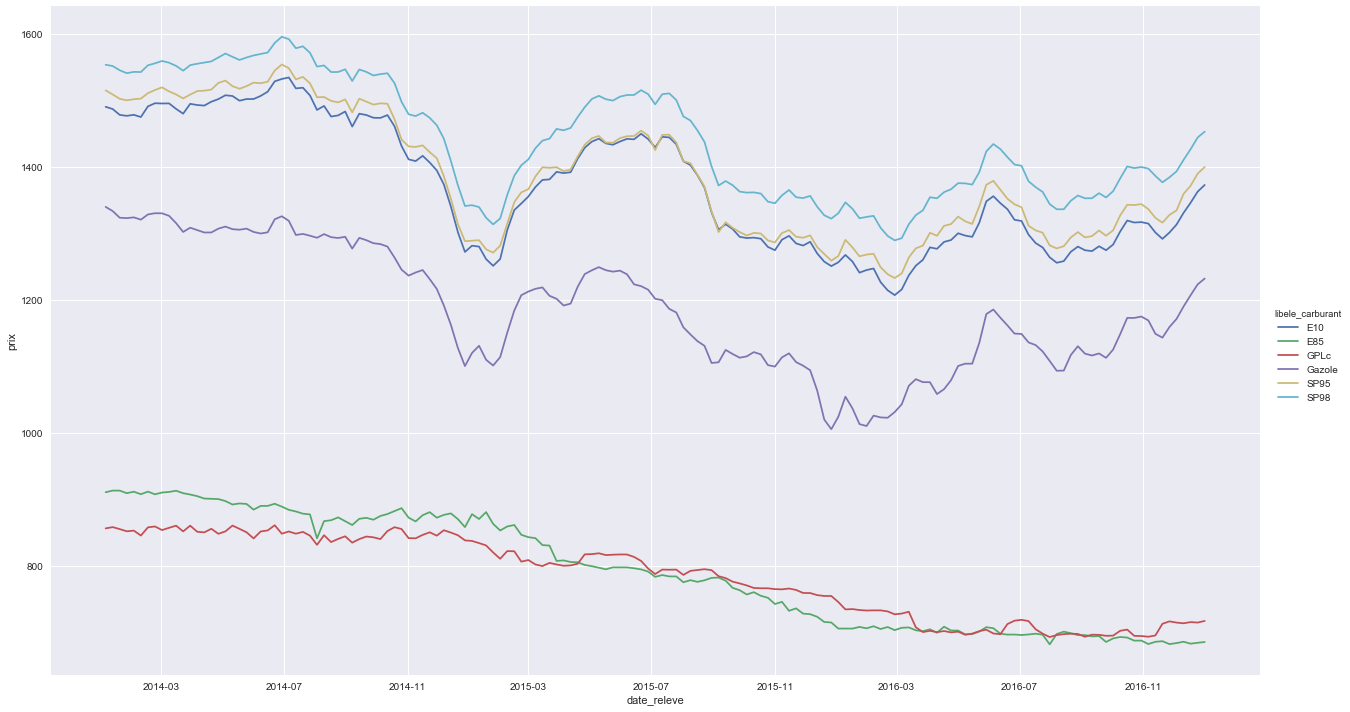

In [37]:
graph = sns.FacetGrid(moyenne_hebdo_df1, hue='libele_carburant', size=10, aspect=16/9)
graph.map(plt.plot,'date_releve', 'prix') 
graph.add_legend()

In [38]:
### Partie modélisation, mais avant regardé la base station, services 
dfservices.head()

,id_station,code_postal,type_station,latitude,longitude,type_service
0,1000001,01000,R,4.620114e+06,519791.000000,"Station de gonflage,Vente de gaz domestique,Au..."
1,1000002,01000,R,4.621842e+06,522767.000000,"Vente de gaz domestique,Automate CB"
2,1000004,01000,R,4.618836e+06,524447.000000,"Carburant qualité supérieure,GPL,Toilettes pub..."
3,1000005,01000,R,4.620094e+06,519942.024022,"Carburant qualité supérieure,Station de lavage..."
4,1000006,01000,R,4.620754e+06,523758.000000,Vente de gaz domestique


In [39]:
### regarder les types de services, c'est assez melanger, faire des variables binaires par types de services, découper d'abord la chaine de carractère
dfservices.type_service.str.split(',')

0        [Station de gonflage, Vente de gaz domestique,...
1                   [Vente de gaz domestique, Automate CB]
2        [Carburant qualité supérieure, GPL, Toilettes ...
3        [Carburant qualité supérieure, Station de lava...
4                                [Vente de gaz domestique]
5        [Station de lavage, Vente de gaz domestique, A...
6        [Toilettes publiques, Vente de gaz domestique,...
7        [Station de lavage, Vente de gaz domestique, A...
8                                            [Automate CB]
9                                                      NaN
10             [Carburant qualité supérieure, Automate CB]
11                                           [Automate CB]
12       [Carburant qualité supérieure, GPL, Vente de g...
13                  [Vente de gaz domestique, Automate CB]
14       [Carburant qualité supérieure, GPL, Boutique a...
15       [Restauration à emporter, Carburant qualité su...
16       [Restauration sur place, Toilettes publiques, .

In [40]:
## Créer des dummies, skitlearn.pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
dfservices['liste_services'] = dfservices.type_service.str.split(',')

In [44]:
_tokenize = lambda x : x.split(',')

In [46]:
vectorize = CountVectorizer(tokenizer=_tokenize, lowercase=False)

In [47]:
vectorize.fit_transform(dfservices.type_service.fillna('Rien'))

<12391x25 sparse matrix of type '<class 'numpy.int64'>'
	with 75115 stored elements in Compressed Sparse Row format>

SyntaxError: invalid syntax (<ipython-input-48-92b9211bc2ce>, line 1)

In [ ]:
### Model qui va expliquer le niveau de prix (prix élevé) en fonction des types de services de la station, code postal, 